In [1]:
# import pandas as pd

# path = 'data/ALL_CITY_DAILY_CASES.csv'

# DATE2CITYCASE = pd.read_csv(path).iloc[:, 1:]
# DATE2CITYCASE['Date'] = pd.to_datetime(DATE2CITYCASE['Date'])
# DATE2CITYCASE = DATE2CITYCASE.sort_values('Date').reset_index(drop = True)
# DATE2CITYCASE


# path = 'data/Lower_Tier_Local_Authority_to_Upper_Tier_Local_Authority_(December_2016)_Lookup_in_England_and_Wales.csv'
# df = pd.read_csv(path)
# df[df['LTLA16NM'].isin(['East Hampshire', 'Burnley'])]

# df[df['LTLA16NM'].isin(city_list)]

# Covid Case By City

In [2]:
import pandas as pd


city_list = ['Brighton and Hove',
 'Liverpool',
 'Sheffield',
 'Norfolk',
 'Leeds',
 'Manchester',
 'East Hampshire',
 'Leicester',
 'Wolverhampton',
 'Newcastle upon Tyne',
 'Southampton',
 'Burnley',
 'Hertfordshire',
 'Birmingham',
 'Bournemouth, Christchurch and Poole']



path = 'data/utla_2022-02-25.csv'
DATE2CITYCASE = pd.read_csv(path)#.iloc[:, 1:]
# DATE2CITYCASE['Date'] = pd.to_datetime(DATE2CITYCASE['Date'])
# DATE2CITYCASE = DATE2CITYCASE.sort_values('Date').reset_index(drop = True)
DATE2CITYCASE = DATE2CITYCASE[DATE2CITYCASE['areaName'].isin(city_list)].reset_index(drop = True)

collected_city_list = DATE2CITYCASE['areaName'].unique()
omitted = [i for i in city_list if i not in collected_city_list]
# print(omitted)
df_ulta = DATE2CITYCASE
df_ulta


import pandas as pd
path = 'data/ltla_2022-02-25.csv'
DATE2CITYCASE = pd.read_csv(path)#.iloc[:, 1:]
# DATE2CITYCASE['Date'] = pd.to_datetime(DATE2CITYCASE['Date'])
# DATE2CITYCASE = DATE2CITYCASE.sort_values('Date').reset_index(drop = True)
DATE2CITYCASE = DATE2CITYCASE[DATE2CITYCASE['areaName'].isin(omitted)].reset_index(drop = True)

df_ltla = DATE2CITYCASE
df_ltla

DATE2CITYCASE = pd.concat([df_ulta, df_ltla]).reset_index(drop = True)
DATE2CITYCASE['date'] = pd.to_datetime(DATE2CITYCASE['date'])
DATE2CITYCASE = DATE2CITYCASE.sort_values('date').reset_index(drop = True)
DATE2CITYCASE = DATE2CITYCASE.rename(columns = {"date": 'Date'})

DATE2CITYCASE

,areaCode,areaName,areaType,Date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate
0,E08000012,Liverpool,utla,2020-02-02,1,0.2,1.0
1,E08000012,Liverpool,utla,2020-02-03,1,0.2,0.0
2,E08000012,Liverpool,utla,2020-02-04,1,0.2,0.0
3,E06000043,Brighton and Hove,utla,2020-02-05,1,0.3,1.0
4,E08000012,Liverpool,utla,2020-02-05,1,0.2,0.0
...,...,...,...,...,...,...,...
10888,E08000035,Leeds,utla,2022-02-24,244026,30549.6,134.0
10889,E07000117,Burnley,ltla,2022-02-24,30386,34010.1,6.0
10890,E08000019,Sheffield,utla,2022-02-24,164923,27990.3,79.0
10891,E08000003,Manchester,utla,2022-02-24,176577,31773.3,66.0


In [3]:
areaCodes = DATE2CITYCASE['areaCode'].unique()
city_population = pd.read_csv('data/ONS-population_2021-08-05.csv')
city_population = city_population[city_population['areaCode'].isin(areaCodes)]
# city_population = city_population[city_population['areaCode'] == 'E08000012']
city_population = city_population[city_population['category'].isin(['ALL'])].reset_index(drop = True)
city_population

,category,areaCode,gender,age,population
0,ALL,E06000016,ALL,ALL,354036
1,ALL,E06000043,ALL,ALL,291738
2,ALL,E06000045,ALL,ALL,252872
3,ALL,E06000058,ALL,ALL,396989
4,ALL,E07000085,ALL,ALL,123838
5,ALL,E07000117,ALL,ALL,89344
6,ALL,E08000003,ALL,ALL,555741
7,ALL,E08000012,ALL,ALL,500474
8,ALL,E08000019,ALL,ALL,589214
9,ALL,E08000021,ALL,ALL,306824


In [4]:
DATE2CITYCASE = pd.merge(DATE2CITYCASE, city_population[['areaCode', 'population']], on = 'areaCode')
DATE2CITYCASE

,areaCode,areaName,areaType,Date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,population
0,E08000012,Liverpool,utla,2020-02-02,1,0.2,1.0,500474
1,E08000012,Liverpool,utla,2020-02-03,1,0.2,0.0,500474
2,E08000012,Liverpool,utla,2020-02-04,1,0.2,0.0,500474
3,E08000012,Liverpool,utla,2020-02-05,1,0.2,0.0,500474
4,E08000012,Liverpool,utla,2020-02-06,1,0.2,0.0,500474
...,...,...,...,...,...,...,...,...
10888,E07000117,Burnley,ltla,2022-02-20,30299,33912.7,26.0,89344
10889,E07000117,Burnley,ltla,2022-02-21,30336,33954.2,37.0,89344
10890,E07000117,Burnley,ltla,2022-02-22,30362,33983.3,26.0,89344
10891,E07000117,Burnley,ltla,2022-02-23,30380,34003.4,18.0,89344


In [5]:
import numpy as np

DATE2CITYCASE['newCasePerK'] = DATE2CITYCASE['newCasesBySpecimenDate'] / DATE2CITYCASE['population']  * 1000
DATE2CITYCASE['logCasePerK'] = np.log(DATE2CITYCASE['cumCasesBySpecimenDate'] / DATE2CITYCASE['population'])
# DATE2CITYCASE['logNewCasePerK'] = np.log(DATE2CITYCASE['newCasesBySpecimenDate'] / DATE2CITYCASE['population'])

DATE2CITYCASE

,areaCode,areaName,areaType,Date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,population,newCasePerK,logCasePerK
0,E08000012,Liverpool,utla,2020-02-02,1,0.2,1.0,500474,0.001998,-13.123311
1,E08000012,Liverpool,utla,2020-02-03,1,0.2,0.0,500474,0.000000,-13.123311
2,E08000012,Liverpool,utla,2020-02-04,1,0.2,0.0,500474,0.000000,-13.123311
3,E08000012,Liverpool,utla,2020-02-05,1,0.2,0.0,500474,0.000000,-13.123311
4,E08000012,Liverpool,utla,2020-02-06,1,0.2,0.0,500474,0.000000,-13.123311
...,...,...,...,...,...,...,...,...,...,...
10888,E07000117,Burnley,ltla,2022-02-20,30299,33912.7,26.0,89344,0.291010,-1.081379
10889,E07000117,Burnley,ltla,2022-02-21,30336,33954.2,37.0,89344,0.414130,-1.080159
10890,E07000117,Burnley,ltla,2022-02-22,30362,33983.3,26.0,89344,0.291010,-1.079302
10891,E07000117,Burnley,ltla,2022-02-23,30380,34003.4,18.0,89344,0.201468,-1.078710


In [6]:
DATE2CITYCASE['Date'] = DATE2CITYCASE['Date'].dt.date
DATE2CITYCASE

,areaCode,areaName,areaType,Date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,population,newCasePerK,logCasePerK
0,E08000012,Liverpool,utla,2020-02-02,1,0.2,1.0,500474,0.001998,-13.123311
1,E08000012,Liverpool,utla,2020-02-03,1,0.2,0.0,500474,0.000000,-13.123311
2,E08000012,Liverpool,utla,2020-02-04,1,0.2,0.0,500474,0.000000,-13.123311
3,E08000012,Liverpool,utla,2020-02-05,1,0.2,0.0,500474,0.000000,-13.123311
4,E08000012,Liverpool,utla,2020-02-06,1,0.2,0.0,500474,0.000000,-13.123311
...,...,...,...,...,...,...,...,...,...,...
10888,E07000117,Burnley,ltla,2022-02-20,30299,33912.7,26.0,89344,0.291010,-1.081379
10889,E07000117,Burnley,ltla,2022-02-21,30336,33954.2,37.0,89344,0.414130,-1.080159
10890,E07000117,Burnley,ltla,2022-02-22,30362,33983.3,26.0,89344,0.291010,-1.079302
10891,E07000117,Burnley,ltla,2022-02-23,30380,34003.4,18.0,89344,0.201468,-1.078710


# Game Info

In [7]:
GAMEINFO = pd.read_csv('data/GAME_TABLE.csv').iloc[:, 1:]
GAMEINFO['Date'] = pd.to_datetime(GAMEINFO['schedule']).dt.date

def update_venue(x):
    x = x.replace('.', '')
    x = x.replace(', Newcastle', '')
    x = x.replace('The ', '')
    x = x.strip()
    
    if 'Stadium' not in x and 'Park' not in x:
        return x + ' Stadium' 
    else:
        return x
    
GAMEINFO['venue'] = GAMEINFO['venue'].apply(lambda x: update_venue(x))

STADIUM = pd.read_csv('data/STADIUM_TABLE.csv')
STADIUM = STADIUM.rename(columns = {'name': 'venue'})
GameInfoStadium = pd.merge(GAMEINFO, STADIUM, on = 'venue')

print(len(GAMEINFO), len(GameInfoStadium))
GameInfoStadium

884 884


,schedule,venue,teamA,teamB,teamA_score,teamB_score,winner_Team,winner_score,venue_location,winner_location,Date,address,Latitude,Longitude,geometry,city,city_candidates
0,2019-08-09 20:00:00,Anfield Stadium,Liverpool,Norwich,4.0,1.0,Liverpool,4.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England",2019-08-09,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.96091,POINT (-2.9609095414165294 53.4308358),Liverpool,Liverpool
1,2019-08-24 17:30:00,Anfield Stadium,Liverpool,Arsenal,3.0,1.0,Liverpool,3.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England",2019-08-24,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.96091,POINT (-2.9609095414165294 53.4308358),Liverpool,Liverpool
2,2019-09-14 12:30:00,Anfield Stadium,Liverpool,Newcastle,3.0,1.0,Liverpool,3.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England",2019-09-14,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.96091,POINT (-2.9609095414165294 53.4308358),Liverpool,Liverpool
3,2019-10-05 15:00:00,Anfield Stadium,Liverpool,Leicester,2.0,1.0,Liverpool,2.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England",2019-10-05,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.96091,POINT (-2.9609095414165294 53.4308358),Liverpool,Liverpool
4,2019-10-27 16:30:00,Anfield Stadium,Liverpool,Tottenham,2.0,1.0,Liverpool,2.0,"Anfield, Liverpool, Merseyside, England","Anfield, Liverpool, Merseyside, England",2019-10-27,"Anfield Stadium, Anfield Road, Anfield, Liverp...",53.430836,-2.96091,POINT (-2.9609095414165294 53.4308358),Liverpool,Liverpool
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,2021-12-10 20:00:00,Brentford Community Stadium,Brentford,Watford,2.0,1.0,Brentford,2.0,"166 Lionel Road North, Brentford, London Borou...","166 Lionel Road North, Brentford, London Borou...",2021-12-10,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.28898,POINT (-0.2889802136183117 51.49071295),London,London
880,2021-12-29 20:15:00,Brentford Community Stadium,Brentford,Man City,0.0,1.0,Man City,1.0,"166 Lionel Road North, Brentford, London Borou...",Etihad Campus\nManchester\nM11 3FF,2021-12-29,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.28898,POINT (-0.2889802136183117 51.49071295),London,London
881,2022-01-02 14:00:00,Brentford Community Stadium,Brentford,A Villa,2.0,1.0,Brentford,2.0,"166 Lionel Road North, Brentford, London Borou...","166 Lionel Road North, Brentford, London Borou...",2022-01-02,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.28898,POINT (-0.2889802136183117 51.49071295),London,London
882,2022-01-19 20:00:00,Brentford Community Stadium,Brentford,Man Utd,1.0,3.0,Man Utd,3.0,"166 Lionel Road North, Brentford, London Borou...",Sir Matt Busby Way\nOld Trafford\nTrafford\nGr...,2022-01-19,"Brentford Community Stadium, Lionel Road South...",51.490713,-0.28898,POINT (-0.2889802136183117 51.49071295),London,London


In [8]:
cols = ['Date', 'city', 'venue', 'teamA', 'teamB', 'teamA_score', 'teamB_score',
       'winner_Team', 'winner_score',# 'venue_location', 'winner_location',
       #  'address', 'Latitude', 'Longitude', 'geometry', 'city_candidates', 'schedule', 
       ]

GameInfoStadium = GameInfoStadium[cols]
GameInfoStadium = GameInfoStadium.reset_index(drop = True)

Team2VenueCity = pd.read_csv('data/STADIUM_TEAM.csv')
team2city = Team2VenueCity[['team', 'city']].set_index('team').to_dict()['city']
# team2city

abrr2fullteamname = {'A Villa': 'Aston Villa',
 "B'mouth": 'Bournemouth',
 "Brentford": "Brentford FC",
 'C Palace': 'Crystal Palace',
 'Leeds': 'Leeds United', 
 'Leicester': 'Leicester City', 
 'Man City':'Mancheter City',  
 'Man Utd': 'Manchester United',
 'Norwich': 'Norwich City',
 'Sheff Utd': 'Sheffield United',
 "So'ton": 'Southampton',
 'W Brom': 'West Brom',
}

GameInfoStadium['teamA'] = GameInfoStadium['teamA'].apply(lambda x: abrr2fullteamname.get(x, x))
GameInfoStadium['teamB'] = GameInfoStadium['teamB'].apply(lambda x: abrr2fullteamname.get(x, x))
GameInfoStadium['winner_Team'] = GameInfoStadium['winner_Team'].apply(lambda x: abrr2fullteamname.get(x, x))


GameInfoStadium['teamAcity'] = GameInfoStadium['teamA'].apply(lambda x: team2city[x])
GameInfoStadium['teamBcity'] = GameInfoStadium['teamB'].apply(lambda x: team2city[x])
GameInfoStadium['winner_TeamCity'] = GameInfoStadium['winner_Team'].apply(lambda x: team2city[x])


GameInfoStadium['loser_TeamCity'] = GameInfoStadium.apply(lambda x: x['teamAcity'] if x['teamAcity'] != x['winner_TeamCity'] else x['teamBcity'], axis = 1)


GameInfoStadium = GameInfoStadium[GameInfoStadium['teamAcity'] != 'London']
GameInfoStadium = GameInfoStadium[GameInfoStadium['teamBcity'] != 'London']
GameInfoStadium = GameInfoStadium[GameInfoStadium['Date'] >= pd.to_datetime('2020-06-01').date()]
GameInfoStadium = GameInfoStadium.sort_values('Date').reset_index(drop = True)
GameInfoStadium


,Date,city,venue,teamA,teamB,teamA_score,teamB_score,winner_Team,winner_score,teamAcity,teamBcity,winner_TeamCity,loser_TeamCity
0,2020-06-19,Norfolk,Carrow Road Stadium,Norwich City,Southampton,0.0,3.0,Southampton,3.0,Norfolk,Southampton,Southampton,Norfolk
1,2020-06-21,Liverpool,Goodison Park,Everton,Liverpool,0.0,0.0,Liverpool,0.0,Liverpool,Liverpool,Liverpool,Liverpool
2,2020-06-21,Newcastle upon Tyne,St James' Park,Newcastle,Sheffield United,3.0,0.0,Newcastle,3.0,Newcastle upon Tyne,Sheffield,Newcastle upon Tyne,Sheffield
3,2020-06-22,Manchester,Etihad Stadium,Mancheter City,Burnley,5.0,0.0,Mancheter City,5.0,Manchester,Burnley,Manchester,Burnley
4,2020-06-23,Leicester,King Power Stadium,Leicester City,Brighton,0.0,0.0,Brighton,0.0,Leicester,Brighton and Hove,Brighton and Hove,Leicester
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2022-01-21,Hertfordshire,Vicarage Road Stadium,Watford,Norwich City,0.0,3.0,Norwich City,3.0,Hertfordshire,Norfolk,Norfolk,Hertfordshire
286,2022-01-22,Leeds,Elland Road Stadium,Leeds United,Newcastle,0.0,1.0,Newcastle,1.0,Leeds,Newcastle upon Tyne,Newcastle upon Tyne,Leeds
287,2022-01-22,Liverpool,Goodison Park,Everton,Aston Villa,0.0,1.0,Aston Villa,1.0,Liverpool,Birmingham,Birmingham,Liverpool
288,2022-01-22,Southampton,St Mary's Stadium,Southampton,Mancheter City,1.0,1.0,Mancheter City,1.0,Southampton,Manchester,Manchester,Southampton


In [9]:
GameInfoStadium

,Date,city,venue,teamA,teamB,teamA_score,teamB_score,winner_Team,winner_score,teamAcity,teamBcity,winner_TeamCity,loser_TeamCity
0,2020-06-19,Norfolk,Carrow Road Stadium,Norwich City,Southampton,0.0,3.0,Southampton,3.0,Norfolk,Southampton,Southampton,Norfolk
1,2020-06-21,Liverpool,Goodison Park,Everton,Liverpool,0.0,0.0,Liverpool,0.0,Liverpool,Liverpool,Liverpool,Liverpool
2,2020-06-21,Newcastle upon Tyne,St James' Park,Newcastle,Sheffield United,3.0,0.0,Newcastle,3.0,Newcastle upon Tyne,Sheffield,Newcastle upon Tyne,Sheffield
3,2020-06-22,Manchester,Etihad Stadium,Mancheter City,Burnley,5.0,0.0,Mancheter City,5.0,Manchester,Burnley,Manchester,Burnley
4,2020-06-23,Leicester,King Power Stadium,Leicester City,Brighton,0.0,0.0,Brighton,0.0,Leicester,Brighton and Hove,Brighton and Hove,Leicester
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2022-01-21,Hertfordshire,Vicarage Road Stadium,Watford,Norwich City,0.0,3.0,Norwich City,3.0,Hertfordshire,Norfolk,Norfolk,Hertfordshire
286,2022-01-22,Leeds,Elland Road Stadium,Leeds United,Newcastle,0.0,1.0,Newcastle,1.0,Leeds,Newcastle upon Tyne,Newcastle upon Tyne,Leeds
287,2022-01-22,Liverpool,Goodison Park,Everton,Aston Villa,0.0,1.0,Aston Villa,1.0,Liverpool,Birmingham,Birmingham,Liverpool
288,2022-01-22,Southampton,St Mary's Stadium,Southampton,Mancheter City,1.0,1.0,Mancheter City,1.0,Southampton,Manchester,Manchester,Southampton


In [16]:
winner_records = GameInfoStadium[['Date', 'winner_TeamCity']].reset_index(drop = True)
winner_records = winner_records.rename(columns = {'winner_TeamCity': 'areaName'})
winner_records['Winner'] = 1
winner_records = winner_records.groupby(['Date', 'areaName']).sum().reset_index()
winner_records

,Date,areaName,Winner
0,2020-06-19,Southampton,1
1,2020-06-21,Liverpool,1
2,2020-06-21,Newcastle upon Tyne,1
3,2020-06-22,Manchester,1
4,2020-06-23,Brighton and Hove,1
...,...,...,...
276,2022-01-21,Norfolk,1
277,2022-01-22,Birmingham,1
278,2022-01-22,Manchester,1
279,2022-01-22,Newcastle upon Tyne,1


In [18]:
CityDateCovidSoccer = pd.merge(DATE2CITYCASE, winner_records, on = ['Date', 'areaName'], how = 'left')
CityDateCovidSoccer

,areaCode,areaName,areaType,Date,cumCasesBySpecimenDate,cumCasesBySpecimenDateRate,newCasesBySpecimenDate,population,newCasePerK,logCasePerK,Winner
0,E08000012,Liverpool,utla,2020-02-02,1,0.2,1.0,500474,0.001998,-13.123311,NaN
1,E08000012,Liverpool,utla,2020-02-03,1,0.2,0.0,500474,0.000000,-13.123311,NaN
2,E08000012,Liverpool,utla,2020-02-04,1,0.2,0.0,500474,0.000000,-13.123311,NaN
3,E08000012,Liverpool,utla,2020-02-05,1,0.2,0.0,500474,0.000000,-13.123311,NaN
4,E08000012,Liverpool,utla,2020-02-06,1,0.2,0.0,500474,0.000000,-13.123311,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10888,E07000117,Burnley,ltla,2022-02-20,30299,33912.7,26.0,89344,0.291010,-1.081379,NaN
10889,E07000117,Burnley,ltla,2022-02-21,30336,33954.2,37.0,89344,0.414130,-1.080159,NaN
10890,E07000117,Burnley,ltla,2022-02-22,30362,33983.3,26.0,89344,0.291010,-1.079302,NaN
10891,E07000117,Burnley,ltla,2022-02-23,30380,34003.4,18.0,89344,0.201468,-1.078710,NaN


In [20]:
CityDateCovidSoccer.to_csv('CityDateCovidSoccer.csv', index = False)

# Selected Game

In [29]:

all_city_list = ['Brighton and Hove',
 'Liverpool',
 'Sheffield',
 'London',
 'Norfolk',
 'Leeds',
 'Manchester',
 'East Hampshire',
 'Leicester',
 'Wolverhampton',
 'Newcastle upon Tyne',
 'Southampton',
 'Burnley',
 'Hertfordshire',
 'Birmingham',
 'Bournemouth, Christchurch and Poole']


window_size = 6
period_window = pd.to_timedelta(window_size, unit = 'D')


L = []
for idx, game in GameInfoStadium.iterrows():
    
    d = game.to_dict()
    
    teamAcity, teamBcity = d['teamAcity'], d['teamBcity']
    
    date = d['Date']
    stt = date - period_window
    end = date + period_window
    
    tmp = GameInfoStadium.copy()
    tmp = tmp[tmp['Date'] > stt] # TODO:  (stt, date)
    tmp = tmp[tmp['Date'] < end]  # TODO: (date, end)
    tmp = tmp[tmp['Date'] != date]
    tmp = tmp.reset_index(drop = True)
    
    d['stt'] = stt
    d['end'] = end
    
    sameday = GameInfoStadium[GameInfoStadium['Date'] == date]
    sameday_teams = [i for i in sameday['teamAcity'].to_list() + sameday['teamBcity'].to_list()]
    sameday_teams = [i for i in sameday_teams if i not in [teamAcity, teamBcity]]
    citylist = set(tmp['teamAcity'].to_list() + tmp['teamBcity'].to_list() + sameday_teams)
    
    if teamAcity in citylist or teamBcity in citylist:
        # go to next game 
        continue
        
    d['CityInGame'] = citylist
    d['CityInGameNum'] = len(citylist)
    d['CityNotInGame'] = [i for i in all_city_list if i not in list(citylist) + [teamAcity, teamBcity, 'London']]
    d['CityNotInGameNum'] = len(d['CityNotInGame'])
    L.append(d)
    
    
SelectedGames = pd.DataFrame(L).sort_values('Date')
SelectedGames = SelectedGames[SelectedGames['CityNotInGameNum'] != 0].reset_index(drop = True)
SelectedGames 

,Date,city,venue,teamA,teamB,teamA_score,teamB_score,winner_Team,winner_score,teamAcity,teamBcity,winner_TeamCity,loser_TeamCity,stt,end,CityInGame,CityInGameNum,CityNotInGame,CityNotInGameNum
0,2020-06-23,Leicester,King Power Stadium,Leicester City,Brighton,0.0,0.0,Brighton,0.0,Leicester,Brighton and Hove,Brighton and Hove,Leicester,2020-06-17,2020-06-29,"{Wolverhampton, Manchester, Southampton, Bourn...",11,"[Leeds, East Hampshire]",2
1,2020-07-26,Liverpool,Goodison Park,Everton,Bournemouth,1.0,3.0,Bournemouth,3.0,Liverpool,"Bournemouth, Christchurch and Poole","Bournemouth, Christchurch and Poole",Liverpool,2020-07-20,2020-08-01,"{Brighton and Hove, Manchester, Leicester, Sou...",9,"[Leeds, East Hampshire, Wolverhampton, Birming...",4
2,2020-07-26,Newcastle upon Tyne,St James' Park,Newcastle,Liverpool,1.0,3.0,Liverpool,3.0,Newcastle upon Tyne,Liverpool,Liverpool,Newcastle upon Tyne,2020-07-20,2020-08-01,"{Brighton and Hove, Manchester, Leicester, Sou...",9,"[Leeds, East Hampshire, Wolverhampton, Birming...",4
3,2020-07-26,Southampton,St Mary's Stadium,Southampton,Sheffield United,3.0,1.0,Southampton,3.0,Southampton,Sheffield,Southampton,Sheffield,2020-07-20,2020-08-01,"{Brighton and Hove, Manchester, Leicester, Bou...",9,"[Leeds, East Hampshire, Wolverhampton, Birming...",4
4,2020-07-26,Burnley,Turf Moor Stadium,Burnley,Brighton,1.0,2.0,Brighton,2.0,Burnley,Brighton and Hove,Brighton and Hove,Burnley,2020-07-20,2020-08-01,"{Manchester, Leicester, Southampton, Bournemou...",9,"[Leeds, East Hampshire, Wolverhampton, Birming...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,2022-01-21,Hertfordshire,Vicarage Road Stadium,Watford,Norwich City,0.0,3.0,Norwich City,3.0,Hertfordshire,Norfolk,Norfolk,Hertfordshire,2022-01-15,2022-01-27,"{Brighton and Hove, Leicester, Manchester, Sou...",8,"[Sheffield, East Hampshire, Wolverhampton, Bur...",5
93,2022-01-22,Leeds,Elland Road Stadium,Leeds United,Newcastle,0.0,1.0,Newcastle,1.0,Leeds,Newcastle upon Tyne,Newcastle upon Tyne,Leeds,2022-01-16,2022-01-28,"{Brighton and Hove, Leicester, Manchester, Sou...",8,"[Sheffield, East Hampshire, Wolverhampton, Bur...",5
94,2022-01-22,Liverpool,Goodison Park,Everton,Aston Villa,0.0,1.0,Aston Villa,1.0,Liverpool,Birmingham,Birmingham,Liverpool,2022-01-16,2022-01-28,"{Brighton and Hove, Leicester, Manchester, Sou...",8,"[Sheffield, East Hampshire, Wolverhampton, Bur...",5
95,2022-01-22,Southampton,St Mary's Stadium,Southampton,Mancheter City,1.0,1.0,Mancheter City,1.0,Southampton,Manchester,Manchester,Southampton,2022-01-16,2022-01-28,"{Brighton and Hove, Leicester, Norfolk, Hertfo...",8,"[Sheffield, East Hampshire, Wolverhampton, Bur...",5


In [9]:
# SelectedGames.to_csv('SelectedGames.csv', index = False)

# Get DID Data

In [10]:
def get_city_records(city, stt, end, DATE2CITYCASE):
    df = DATE2CITYCASE.copy()
    df['Date'] = pd.to_datetime(df['Date'], unit = 'D')
    df = df[df['Date'].dt.date > stt]
    df = df[df['Date'].dt.date < end]
    city_df = df[df['areaName'] == city]
    return city_df

covid_shift_window = 2
covid_window = pd.to_timedelta(covid_shift_window, unit = 'D')

# dep_var = 'newCasePerK'
# dep_var = 'logCasePerK'
dep_var = 'logNewCasePerK'

WholeDataList = []

for idx, row in SelectedGames.iterrows():
    d = row.to_dict()
    
    data_points = []
    
    
    if d['Date'] < pd.to_datetime('2020-04-01').date():
        continue
    
    # game_id = str(d['Date']) + ' ' +  d['city']
    
    ########################### meta
    dp = {}
    dp['date'] = d['Date']
    dp['venue'] = d['city']
    
    ########################### winner
    dp_city = dp.copy()
    city = d['winner_TeamCity']
    dp_city['focal_city'] = city
    dp_city['treatment'] = 'winner'
    dp_city['home'] = 'home' if dp_city['venue'] == city else 'guest'
    
    
    # pre-game
    dp_city_pre = dp_city.copy()
    df = get_city_records(city, d['stt'] + covid_window, d['Date'] + covid_window, DATE2CITYCASE)
    
    if len(df) != window_size - 1:
        continue # next game, this game, the date records is not enough.
        
    # print(df)
    dp_city_pre['PostGame'] = 0
    dp_city_pre[dep_var] = df[dep_var].mean()
    dp_city_pre['WindowDays'] = len(df)
    
    # post-game
    dp_city_post = dp_city.copy()
    df = get_city_records(city, d['Date'] + covid_window, d['end'] + covid_window, DATE2CITYCASE)
    if len(df) != window_size - 1:
        continue # next game, this game, the date records is not enough.
        
    # print(df)
    dp_city_post['PostGame'] = 1
    dp_city_post[dep_var] = df[dep_var].mean()
    dp_city_post['WindowDays'] = len(df)
    
    data_points = data_points + [dp_city_pre, dp_city_post]
    
    
    ########################### loser
    dp_city = dp.copy()
    city = d['loser_TeamCity']
    dp_city['focal_city'] = city
    dp_city['treatment'] = 'loser'
    dp_city['home'] = 'home' if dp_city['venue'] == city else 'guest'
    
    # pre-game
    dp_city_pre = dp_city.copy()
    df = get_city_records(city, d['stt'] + covid_window, d['Date'] + covid_window, DATE2CITYCASE)
    dp_city_pre['PostGame'] = 0
    dp_city_pre[dep_var] = df[dep_var].mean()
    dp_city_pre['WindowDays'] = len(df)
    
    # print(df)
    
    # post-game
    dp_city_post = dp_city.copy()
    df = get_city_records(city, d['Date'] + covid_window, d['end'] + covid_window, DATE2CITYCASE)
    dp_city_post['PostGame'] = 1
    dp_city_post[dep_var] = df[dep_var].mean()
    dp_city_post['WindowDays'] = len(df)
    
    # print(df)
    
    data_points = data_points + [dp_city_pre, dp_city_post]
    
    
    ########################### control city
    for city in d['CityNotInGame']:
        dp_city = dp.copy()
        dp_city['venue'] = 'Control'
        # city = d['loser_TeamCity']
        dp_city['focal_city'] = city
        dp_city['treatment'] = 'control'
        dp_city['home'] = 'control'

        # pre-game
        dp_city_pre = dp_city.copy()
        df = get_city_records(city, d['stt'] + covid_window, d['Date'] + covid_window, DATE2CITYCASE)
        dp_city_pre['PostGame'] = 0
        dp_city_pre[dep_var] = df[dep_var].mean()
        dp_city_pre['WindowDays'] = len(df)
        # print(df)

        # post-game
        dp_city_post = dp_city.copy()
        df = get_city_records(city, d['Date'] + covid_window, d['end'] + covid_window, DATE2CITYCASE)
        dp_city_post['PostGame'] = 1
        dp_city_post[dep_var] = df[dep_var].mean()
        dp_city_post['WindowDays'] = len(df)
        # print(df)

        data_points = data_points + [dp_city_pre, dp_city_post]
        
    WholeDataList = WholeDataList + data_points
    


In [18]:
pd.DataFrame(WholeDataList)

DIDDataSet = pd.DataFrame(WholeDataList)
DIDDataSet = DIDDataSet.drop_duplicates().reset_index(drop = True)
DIDDataSet['index'] = DIDDataSet['focal_city'] + " / " + DIDDataSet['date'].astype(str) #+ " / " + DIDDataSet['venue'].astype(str)

tmp = DIDDataSet['index'].value_counts()#
tmp = tmp[tmp == 4]
print(tmp)
print(len(DIDDataSet))
DIDDataSet = DIDDataSet[-DIDDataSet['index'].isin(tmp.index)].reset_index(drop = True)
print(len(DIDDataSet))


Liverpool / 2020-11-28     4
Liverpool / 2020-10-17     4
Liverpool / 2021-08-14     4
Liverpool / 2020-07-26     4
Manchester / 2021-09-11    4
Manchester / 2021-11-06    4
Liverpool / 2021-08-21     4
Name: index, dtype: int64
1166
1138


In [20]:
# DIDDataSet['logNewCasePerK'].

DIDDataSet = DIDDataSet.replace([np.inf, -np.inf], np.nan)
DIDDataSet = DIDDataSet.dropna()
DIDDataSet


,date,venue,focal_city,treatment,home,PostGame,logNewCasePerK,WindowDays,index
0,2020-06-23,Leicester,Brighton and Hove,winner,guest,0,-11.948001,5,Brighton and Hove / 2020-06-23
1,2020-06-23,Leicester,Brighton and Hove,winner,guest,1,-12.583611,5,Brighton and Hove / 2020-06-23
2,2020-06-23,Leicester,Leicester,loser,home,0,-8.376474,5,Leicester / 2020-06-23
3,2020-06-23,Leicester,Leicester,loser,home,1,-8.716911,5,Leicester / 2020-06-23
4,2020-06-23,Control,Leeds,control,control,0,-10.947023,5,Leeds / 2020-06-23
...,...,...,...,...,...,...,...,...,...
1133,2022-01-23,Control,Wolverhampton,control,control,1,-6.664531,5,Wolverhampton / 2022-01-23
1134,2022-01-23,Control,Burnley,control,control,0,-6.586392,5,Burnley / 2022-01-23
1135,2022-01-23,Control,Burnley,control,control,1,-6.975286,5,Burnley / 2022-01-23
1136,2022-01-23,Control,"Bournemouth, Christchurch and Poole",control,control,0,-6.524513,5,"Bournemouth, Christchurch and Poole / 2022-01-23"


In [21]:
# DIDDataSet
DIDDataSet.to_csv('DIDDataSet.csv', index = False)
DIDDataSet

,date,venue,focal_city,treatment,home,PostGame,logNewCasePerK,WindowDays,index
0,2020-06-23,Leicester,Brighton and Hove,winner,guest,0,-11.948001,5,Brighton and Hove / 2020-06-23
1,2020-06-23,Leicester,Brighton and Hove,winner,guest,1,-12.583611,5,Brighton and Hove / 2020-06-23
2,2020-06-23,Leicester,Leicester,loser,home,0,-8.376474,5,Leicester / 2020-06-23
3,2020-06-23,Leicester,Leicester,loser,home,1,-8.716911,5,Leicester / 2020-06-23
4,2020-06-23,Control,Leeds,control,control,0,-10.947023,5,Leeds / 2020-06-23
...,...,...,...,...,...,...,...,...,...
1133,2022-01-23,Control,Wolverhampton,control,control,1,-6.664531,5,Wolverhampton / 2022-01-23
1134,2022-01-23,Control,Burnley,control,control,0,-6.586392,5,Burnley / 2022-01-23
1135,2022-01-23,Control,Burnley,control,control,1,-6.975286,5,Burnley / 2022-01-23
1136,2022-01-23,Control,"Bournemouth, Christchurch and Poole",control,control,0,-6.524513,5,"Bournemouth, Christchurch and Poole / 2022-01-23"


# City Daily Records

In [12]:
import numpy as np

cityname = 'Leicester'


def get_city_soccer_records(cityname):
    win_record = GameInfoStadium[GameInfoStadium['winner_TeamCity'] == cityname]
    lose_record = GameInfoStadium[GameInfoStadium['loser_TeamCity'] == cityname]

    df = pd.concat([win_record, lose_record]).reset_index(drop = True)
    df['FocalCity'] = cityname
    df['Win'] = (df['FocalCity'] == df['winner_TeamCity']).astype(int)
    df['Lose'] = (df['FocalCity'] != df['winner_TeamCity']).astype(int)
    df['HomeGame'] = (df['FocalCity'] == df['city']).astype(int)
    df['GuestGame'] = (df['FocalCity'] != df['city']).astype(int)
    df['Date'] = pd.to_datetime(df['Date'])
    df = df.sort_values('Date', ascending = True).reset_index(drop = True)
    cols = ['Date', 'FocalCity', 'HomeGame', 'GuestGame', 'Win', 'Lose',
            'city', 'venue', 'teamA', 'teamB', 'teamA_score', 'teamB_score',
           'winner_Team', 'teamAcity', 'teamBcity',
           'winner_TeamCity', 'loser_TeamCity'
           ]
    return df[cols]

CitySoccerRecords = get_city_soccer_records(cityname)
CitySoccerRecords = CitySoccerRecords[['Date', 'HomeGame', 'GuestGame',  'Win', 'Lose']].groupby('Date').sum().reset_index()

In [13]:


CovidInfo = DATE2CITYCASE[DATE2CITYCASE['CityName'] == cityname].reset_index(drop = True)
CovidInfo['Date'] = pd.to_datetime(CovidInfo['Date'])
# CovidInfo
CovidSoccer = pd.merge(CovidInfo, CitySoccerRecords[['Date', 'HomeGame', 'GuestGame', 'Win', 'Lose']], on = 'Date', how = 'left')
CovidSoccer = CovidSoccer.sort_values('Date').reset_index(drop = True)
# CovidSoccer = CovidSoccer.set_index('Date')
# CovidSoccer['Lose'] = CovidSoccer['Win'].apply(lambda x: int(x == 0))
# CovidSoccer['Win2'] = CovidSoccer['Win'].apply(lambda x: (1+x)*100000).fillna(0)
CovidSoccer['Win'] = CovidSoccer['Win'].fillna(0).astype(int)
CovidSoccer['Lose'] = CovidSoccer['Lose'].fillna(0).astype(int)
CovidSoccer['HomeGame'] = CovidSoccer['HomeGame'].fillna(0).astype(int)
CovidSoccer['GuestGame'] = CovidSoccer['GuestGame'].fillna(0).astype(int)

CovidSoccer['logCummulativeCases'] = np.log(CovidSoccer['CummulativeCases'])

cols = ['Date', 'CityName', 'DailyCases', 'CummulativeCases', 'logCummulativeCases', 'HomeGame', 'GuestGame', 'Win', 'Lose']
CovidSoccer = CovidSoccer[cols]

CovidSoccer


KeyError: 'CityName'

In [29]:
# CovidSoccer.groupby('Date')

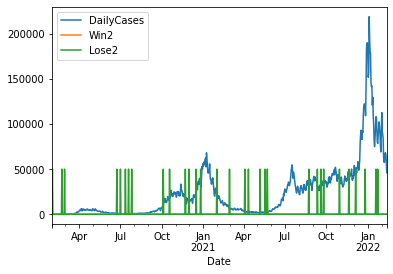

In [30]:
import matplotlib.pyplot as plt

# CovidSoccer[['DailyCases', 'Win2']].plot()
CovidSoccer['Win2'] = CovidSoccer['Win'] * 50000
CovidSoccer['Lose2'] = CovidSoccer['Lose'] * 50000
ax = CovidSoccer[['Date', 'DailyCases', 'Win2', 'Lose2']].plot(x = 'Date', linestyle='-')
# CovidSoccer[['Date', 'Win', 'Lose']].plot(x = 'Date', kind='bar', ax = ax)

# ax

# Generate Data


In [34]:
import numpy as np


city_list = ['Brighton and Hove',
 'Liverpool',
 'Sheffield',
 'London',
 'Norfolk',
 'Leeds',
 'Manchester',
 'East Hampshire',
 'Leicester',
 'Wolverhampton',
 'Newcastle upon Tyne',
 'Southampton',
 'Burnley',
 'Hertfordshire',
 'Birmingham',
 'Bournemouth, Christchurch and Poole']


L = []
for cityname in city_list:
    
    
    CitySoccerRecords = get_city_soccer_records(cityname)
    # CitySoccerRecords
    CitySoccerRecords = CitySoccerRecords[['Date', 'HomeGame', 'GuestGame',  'Win', 'Lose']].groupby('Date').sum().reset_index()
    

    

    CovidInfo = DATE2CITYCASE[DATE2CITYCASE['CityName'] == cityname].reset_index(drop = True)
    CovidInfo['Date'] = pd.to_datetime(CovidInfo['Date'])
    # CovidInfo
    CovidSoccer = pd.merge(CovidInfo, CitySoccerRecords[['Date', 'HomeGame', 'GuestGame', 'Win', 'Lose']], on = 'Date', how = 'left')
    CovidSoccer = CovidSoccer.sort_values('Date').reset_index(drop = True)
    # CovidSoccer = CovidSoccer.set_index('Date')
    # CovidSoccer['Lose'] = CovidSoccer['Win'].apply(lambda x: int(x == 0))
    # CovidSoccer['Win2'] = CovidSoccer['Win'].apply(lambda x: (1+x)*100000).fillna(0)
    CovidSoccer['Win'] = CovidSoccer['Win'].fillna(0).astype(int)
    CovidSoccer['Lose'] = CovidSoccer['Lose'].fillna(0).astype(int)
    CovidSoccer['HomeGame'] = CovidSoccer['HomeGame'].fillna(0).astype(int)
    CovidSoccer['GuestGame'] = CovidSoccer['GuestGame'].fillna(0).astype(int)

    CovidSoccer['logCummulativeCases'] = np.log(CovidSoccer['CummulativeCases'])

    cols = ['Date', 'CityName', 'DailyCases', 'CummulativeCases', 'logCummulativeCases', 'HomeGame', 'GuestGame', 'Win', 'Lose']
    CovidSoccer = CovidSoccer[cols]

    print(cityname, len(CovidSoccer))
    
    L.append(CovidSoccer)
    
    
df = pd.concat(L).reset_index(drop = True)
df

Brighton and Hove 744
Liverpool 744
Sheffield 744
London 744
Norfolk 744
Leeds 744
Manchester 744
East Hampshire 744
Leicester 744
Wolverhampton 744
Newcastle upon Tyne 744
Southampton 744
Burnley 744
Hertfordshire 744
Birmingham 744
Bournemouth, Christchurch and Poole 744


,Date,CityName,DailyCases,CummulativeCases,logCummulativeCases,HomeGame,GuestGame,Win,Lose
0,2020-01-31,Brighton and Hove,2,2,0.693147,0,0,0,0
1,2020-02-01,Brighton and Hove,0,2,0.693147,0,1,1,0
2,2020-02-02,Brighton and Hove,0,2,0.693147,0,0,0,0
3,2020-02-03,Brighton and Hove,0,2,0.693147,0,0,0,0
4,2020-02-04,Brighton and Hove,0,2,0.693147,0,0,0,0
...,...,...,...,...,...,...,...,...,...
11899,2022-02-08,"Bournemouth, Christchurch and Poole",66183,17932803,16.702142,0,0,0,0
11900,2022-02-09,"Bournemouth, Christchurch and Poole",68214,18000119,16.705889,0,0,0,0
11901,2022-02-10,"Bournemouth, Christchurch and Poole",66638,18162199,16.714853,0,0,0,0
11902,2022-02-11,"Bournemouth, Christchurch and Poole",58899,18220515,16.718059,0,0,0,0


In [35]:
df.to_csv('data/CityDateCovidSoccer.csv', index = False)

In [37]:
d.nunique()

11904